In [1]:
from classificazione_knn import image_to_data,\
    colimage_to_classes,\
    local_entropy,\
    classes_to_colimage,\
    postprocessing_classes,\
    select_layers,\
    image_segmentation,\
    train_on_multi,\
    test_on_multiple_images
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import imageio
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef, plot_confusion_matrix

In [2]:
# Creazione del modello allenandolo su più immagini
knn, score, conf_matrix = train_on_multi(
    ["img/pelle303R.PNG", "img/pelle304R.PNG", "img/pelle601R.PNG"],
    ["img/pelle303R_colors.PNG", "img/pelle304R_colors.PNG", "img/pelle601R_colors.PNG"],
    ["img/pelle301R.PNG", "img/pelle302R.PNG", "img/pelle305R.PNG"],
    ["img/pelle301R_colors.PNG", "img/pelle302R_colors.PNG", "img/pelle305R_colors.PNG"],
    window_size=30,
    neighbors=50,
    window_size_postprocessing=6,
    feature_names=['R', 'G', 'B', 'R_mf', 'G_mf', 'B_mf', 'R_variance', 'G_variance', 'B_variance', 'entropy']
)

print("Score: {}".format(score))

Score: 0.7558992348733533


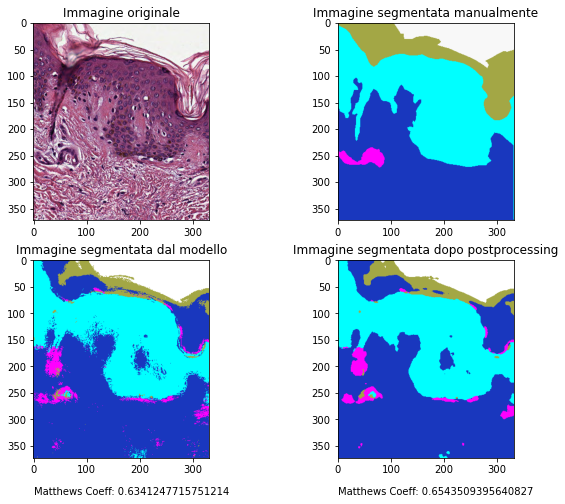

In [27]:
# Generazione dei grafici su una sola immagine di test
image_segmentation(
    knn,
    "img/pelle302R.PNG",
    "img/pelle302R_colors.PNG",
    window_size=30,
    window_size_postprocessing=6,
    feature_names=['R', 'G', 'B', 'R_mf', 'G_mf', 'B_mf', 'R_variance', 'G_variance', 'B_variance', 'entropy']
)

In [28]:
#np.seterr("raise")
np.seterr("warn")

# Riutilizziamo il modello creato prima
# ma calcoliamo il matthews coefficient medio per diverse immagini di test
mc, cm = test_on_multiple_images(knn,
                        ["img/pelle302R.PNG"],
                        ["img/pelle302R_colors.PNG"],
                        window_size=30,
                        feature_names=['R', 'G', 'B', 'R_mf', 'G_mf', 'B_mf', 'R_variance', 'G_variance', 'B_variance', 'entropy'],
                        window_size_postprocessing=6)

In [29]:
# Calcolo e plot della confusion matrix
print(mc) # matthews coeff
print(cm) # confusion matrix

0.6341247715751214
[[    0     0     0     0     0]
 [  350  5795   531  9464   447]
 [    0   226 36652  3755  1003]
 [    0   142  1691 49277  1852]
 [10772   275   106   630   868]]


In [30]:
np.sum(cm)

123836

In [31]:
cm[0].sum()

0

In [32]:
def normalizza_cm(cm):
    
    new_mat = []
    
    for riga in cm:
        new_mat.append([])
        tot_riga = riga.sum()
        for v in riga:
            new_mat[-1].append(v/tot_riga)
    
    return np.array(new_mat)

In [33]:
normalizza_cm(cm)

<ipython-input-32-e94c88a98b46>:9: RuntimeWarning: invalid value encountered in long_scalars
  new_mat[-1].append(v/tot_riga)


array([[       nan,        nan,        nan,        nan,        nan],
       [0.02110086, 0.34936999, 0.03201302, 0.57056731, 0.02694882],
       [0.        , 0.005428  , 0.8802959 , 0.09018638, 0.02408973],
       [0.        , 0.00268117, 0.03192855, 0.93042181, 0.03496847],
       [0.85147419, 0.02173741, 0.00837878, 0.04979843, 0.06861118]])

<ipython-input-32-e94c88a98b46>:9: RuntimeWarning: invalid value encountered in long_scalars
  new_mat[-1].append(v/tot_riga)


[Text(0, 0, ''),
 Text(0, 0, 'vetrino'),
 Text(0, 0, 'strato corneo'),
 Text(0, 0, 'epidermide'),
 Text(0, 0, 'derma'),
 Text(0, 0, 'vasi')]

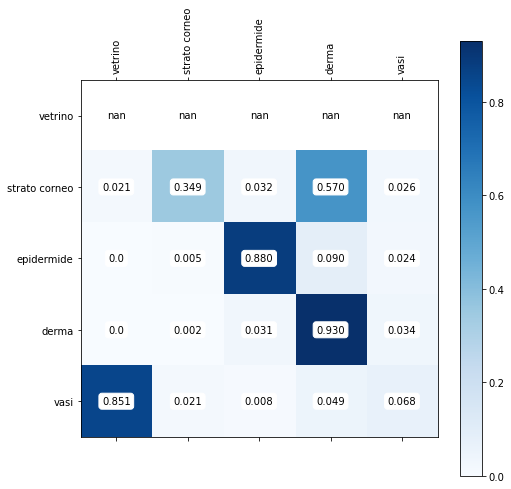

In [34]:
# Mostrare la matrice di confusione

cm_norm = normalizza_cm(cm)
labels = [None, "vetrino","strato corneo","epidermide","derma","vasi"]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm_norm, interpolation='nearest', cmap="Blues")
fig.colorbar(cax)

for (i, j), z in np.ndenumerate(cm_norm):
    ax.text(j, i, '{}'.format(str(z)[:5]), ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor="white"))

ax.set_xticklabels(labels, rotation="vertical")
ax.set_yticklabels(labels)